# Comparing Results

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from os.path import join
sns.set()
%matplotlib inline

## Settings

In [2]:
SUBJ_ID = "784565"
DATA_DIR = "/home/agajan/experiment_DiffusionMRI/tractseg_data/"
TRACT_MASKS_PTH = join(DATA_DIR, SUBJ_ID, "tract_masks", "tract_masks.nii.gz")
FEATURES_NAMES = ["MODEL1_DENOISING_P10", "MODEL1_DENOISING_P20", "MODEL1_DENOISING_P30",
                  "MODEL1_DENOISING_P40", "MODEL1_DENOISING_P50"]
FEATURES_LABELS = [b"$p=0.1$", b"$p=0.2$", b"$p=0.3$",
                   b"$p=0.4$", b"$p=0.5$"]
LABELS = ["CG", "CST", "FX", "CC", "Avg. DICE"]

In [3]:
results_list = []
data = []
for flabel, fname in zip(FEATURES_LABELS, FEATURES_NAMES):
    # load results
    results = np.load(join(DATA_DIR, SUBJ_ID, "outputs", fname + "_dice_scores.npz"))
    data += [[flabel, t, s, "Test Set 1 (Neighboring slices)"] for 
             t, s in zip(LABELS, results["testset1"])]
    data += [[flabel, t, s, "Test Set 2 (Full brain)"] for 
             t, s in zip(LABELS, results["testset2"])]

df = pd.DataFrame(data, columns=["Feature", "Tract", "DICE Score", "Dataset"])

/home/agajan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


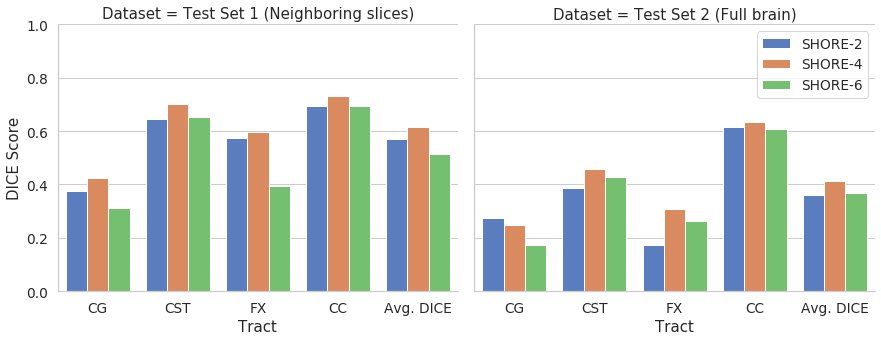

In [4]:
# sns.set(font_scale=1.25, style="whitegrid")
# ordered= df.Dataset.value_counts().index
# g = sns.FacetGrid(df, col="Dataset", row_order=ordered, height=5, aspect=1.25, legend_out=False, ylim=(0, 1))
# g.map(sns.barplot, "Tract", "DICE Score", hue="Feature", palette=sns.color_palette("muted"), data=df)
# plt.legend()
# plt.show()

sns.set(font_scale=1.25, style="whitegrid")
ordered= df.Dataset.value_counts().index
g = sns.FacetGrid(df, col="Dataset", row_order=ordered, height=5, aspect=1.25, legend_out=False, ylim=(0, 1))
g.map(sns.barplot, "Tract", "DICE Score", hue="Feature", palette=sns.color_palette("muted"), data=df)
plt.legend()
plt.show()